## Postwork 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### DESARROLLO

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.
2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/LIZZETHGOMEZ/Data-Science-Fase-3-BEDU-Santander/main/Data/cleanData.csv", index_col = 0)
df.head()

,country,year,respiratory_infections_and_tuberculosis_number,respiratory_infections_and_tuberculosis_percent,respiratory_infections_and_tuberculosis_rate,chronic_respiratory_diseases_number,chronic_respiratory_diseases_percent,chronic_respiratory_diseases_rate,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp,total_respiratory_diseases,total_diseases_percent
0,Mexico,1990,39290,0.08916,45.96035,16909,0.03839,19.78044,417.45,290.01,88.10,37.47,1.87,20.958333,56199,0.12755
1,Canada,1990,6797,0.03571,24.93967,9319,0.04895,34.19049,626.36,483.99,87.75,42.92,11.70,-7.450000,16116,0.08466
2,Israel,1990,772,0.02651,15.56473,1327,0.04556,26.75464,43.95,33.78,8.35,1.62,0.21,19.816667,2099,0.07207
3,Japan,1990,68816,0.08483,54.67434,29862,0.03681,23.72535,1109.37,1016.89,37.86,28.33,26.30,11.658333,98678,0.12164
4,Mexico,1991,37046,0.08447,42.53984,17171,0.03917,19.71738,435.45,308.41,88.71,36.36,1.97,20.891667,54217,0.12364


Primeramente identificamos las columnas de nuestro dataset que sean de tipo numérico

In [ ]:
df.dtypes[(df.dtypes=='float64') | (df.dtypes=='int64')]

year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object

In [5]:
#Conviertiendo la columna 'country' a tipo categórica
#df['country'] = df['country'].astype('category')

#Eliminando columna 'country'
df = df.drop(columns='country')

Corroboramos que las columnas efectivamente sean numéricas y revisamos que no contengan ningún NaN

In [6]:
#2 Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
print(df.dtypes)
df.isna().sum()

year                                                 int64
respiratory_infections_and_tuberculosis_number       int64
respiratory_infections_and_tuberculosis_percent    float64
respiratory_infections_and_tuberculosis_rate       float64
chronic_respiratory_diseases_number                  int64
chronic_respiratory_diseases_percent               float64
chronic_respiratory_diseases_rate                  float64
all_greenhouse_gas                                 float64
CO2                                                float64
CH4                                                float64
N2O                                                float64
Fgas                                               float64
mean_annual_temp                                   float64
total_respiratory_diseases                           int64
total_diseases_percent                             float64
dtype: object


year                                               0
respiratory_infections_and_tuberculosis_number     0
respiratory_infections_and_tuberculosis_percent    0
respiratory_infections_and_tuberculosis_rate       0
chronic_respiratory_diseases_number                0
chronic_respiratory_diseases_percent               0
chronic_respiratory_diseases_rate                  0
all_greenhouse_gas                                 0
CO2                                                0
CH4                                                0
N2O                                                0
Fgas                                               0
mean_annual_temp                                   0
total_respiratory_diseases                         0
total_diseases_percent                             0
dtype: int64

El dataset cuenta con distintas columnas que contienen información basada en otras columnas, por lo que se procederá a eliminarlas para evitar correlaciones redundantes

In [7]:
df_simp = df.drop(columns=['year','respiratory_infections_and_tuberculosis_percent','respiratory_infections_and_tuberculosis_rate','chronic_respiratory_diseases_percent','chronic_respiratory_diseases_rate','total_respiratory_diseases','total_diseases_percent']) #'all_greenhouse_gas'
df_simp.dtypes

respiratory_infections_and_tuberculosis_number      int64
chronic_respiratory_diseases_number                 int64
all_greenhouse_gas                                float64
CO2                                               float64
CH4                                               float64
N2O                                               float64
Fgas                                              float64
mean_annual_temp                                  float64
dtype: object

In [9]:
#Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
df_simp.corr()

,respiratory_infections_and_tuberculosis_number,chronic_respiratory_diseases_number,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp
respiratory_infections_and_tuberculosis_number,1.000000,0.773621,0.757036,0.796699,0.304623,0.339676,0.842089,0.149408
chronic_respiratory_diseases_number,0.773621,1.000000,0.826944,0.824136,0.568804,0.576748,0.781837,0.225758
all_greenhouse_gas,0.757036,0.826944,1.000000,0.990066,0.730992,0.749569,0.814105,0.121132
CO2,0.796699,0.824136,0.990066,1.000000,0.629457,0.654810,0.826276,0.071815
CH4,0.304623,0.568804,0.730992,0.629457,1.000000,0.946325,0.459647,0.301297
N2O,0.339676,0.576748,0.749569,0.654810,0.946325,1.000000,0.478968,0.288188
Fgas,0.842089,0.781837,0.814105,0.826276,0.459647,0.478968,1.000000,0.177773
mean_annual_temp,0.149408,0.225758,0.121132,0.071815,0.301297,0.288188,0.177773,1.000000


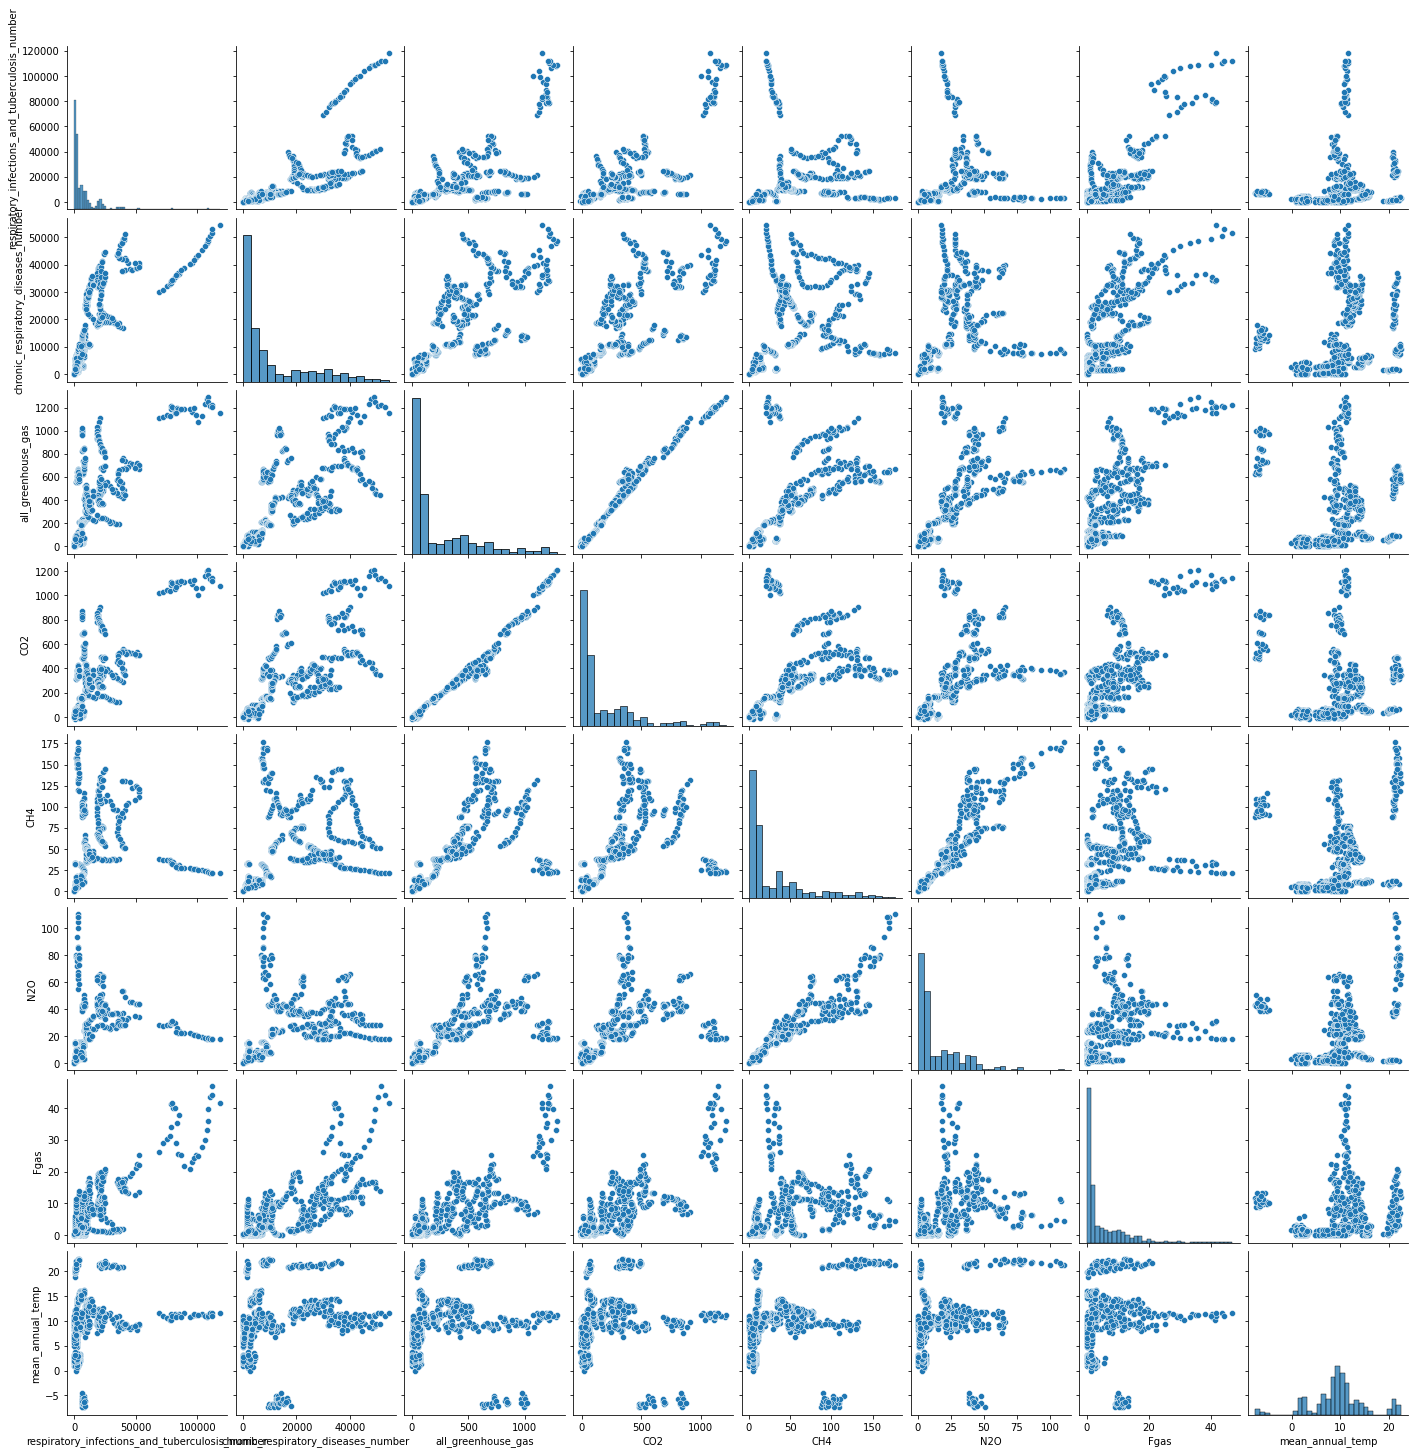

In [11]:
sns.pairplot(df_simp)
#plt.rcParams["figure.figsize"] = (20,20)

<AxesSubplot:>

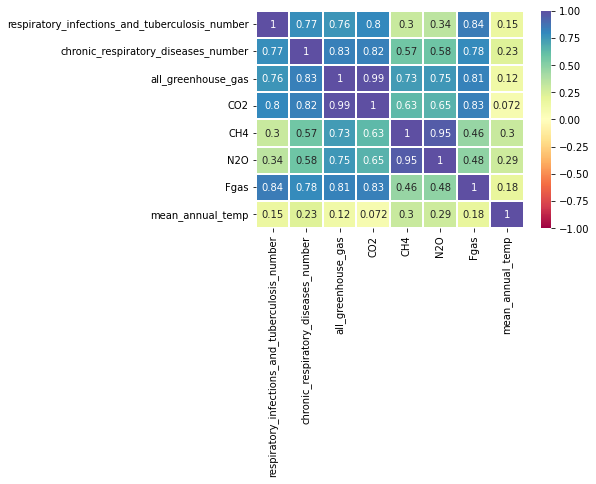

In [12]:
sns.heatmap(df_simp.corr(), vmin=-1, vmax=1, cmap='Spectral',linewidth=2,annot=True)
#plt.rcParams["figure.figsize"] = (8,6)

Se puede observar en la gráfica de calor que no hay presencia de correlaciones negativas, ...

In [ ]:
#4 Utilizando gráficas de dispersión y tus medidas de locación y dispersión, 
# identifica dónde hay valores atípicos y decide qué hacer con ellos.

### Identificación de valores atípicos

In [16]:
#Reset del tamaño de las gráficas
#plt. clf();

columnas = list(df_simp.columns.values)

In [13]:
# fig, ax = plt.subplots(2,4,sharey=True)
# 
# fig.suptitle('Violinplots')
# 
# k=0
# for i in [0,1]:
#     for j in [0,1,2,3]:
#         sns.violinplot(data=df_simp,x=columnas[k], ax=ax[i,j])
#         k+= 1
# 
# plt.rcParams["figure.figsize"] = (15,10)



#ax1.set_title('Latitute')
#sns.scatterplot(x='price', y='long', data=df, ax=ax2)
#ax2.set_title('Longitude')
#sns.violinplot(df_simp['year'], ax=ax[1])


#sns.violinplot(df_simp['year']); #, figsize=(2,5)

In [14]:
df_simp.describe()

,respiratory_infections_and_tuberculosis_number,chronic_respiratory_diseases_number,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,9693.106681,10601.252155,243.078718,190.630916,31.443071,16.072759,4.932263,9.609932
std,17750.419833,12857.808723,305.860433,260.161024,38.572636,18.938883,7.236887,5.671693
min,83.000000,69.000000,-2.870000,-11.810000,0.510000,0.210000,0.000000,-7.450000
25%,1230.000000,1793.000000,41.382500,22.747500,5.872500,3.102500,0.407500,7.029167
50%,2995.500000,4360.000000,74.770000,59.140000,11.750000,6.570000,1.530000,9.650000
75%,9632.000000,16986.500000,398.800000,305.032500,45.102500,24.732500,7.245000,11.785417
max,118141.000000,54301.000000,1289.000000,1211.270000,176.750000,110.290000,46.790000,22.600000


Obteniendo las medidas de locación podemos observar desde la primer columna que la distancia entre el percentil 75 y el valor máximo es muy grande, visualicemos el una gráfica de caja para darnos una mejor idea sobre los valores atípicos contenidos en el dataset

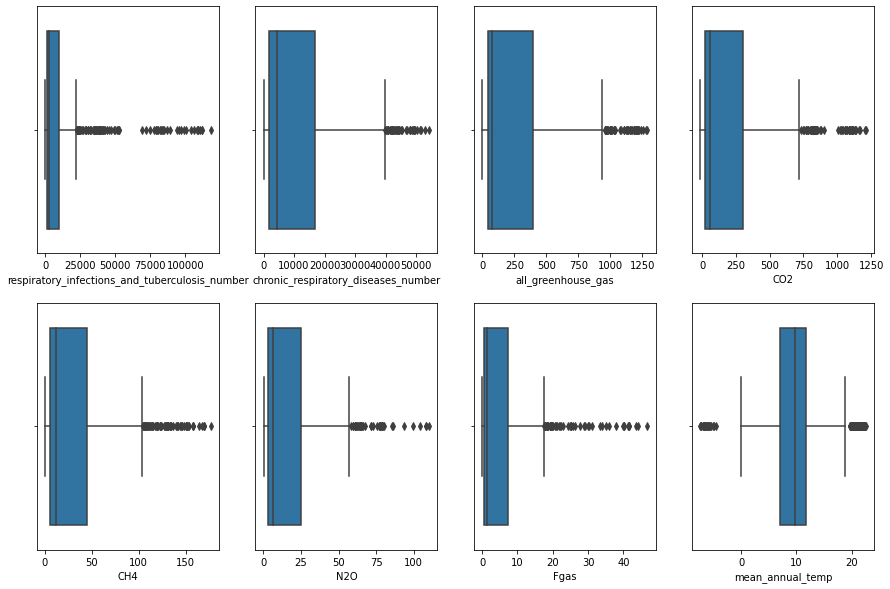

In [20]:
fig, ax1 = plt.subplots(2,4,sharey=True)
k=0

plt.rcParams["figure.figsize"] = (15,10)

for i in [0,1]:
    for j in [0,1,2,3]:
        sns.boxplot(data=df_simp,x=columnas[k], ax=ax1[i,j])
        k+= 1


Eliminando valores atípicos

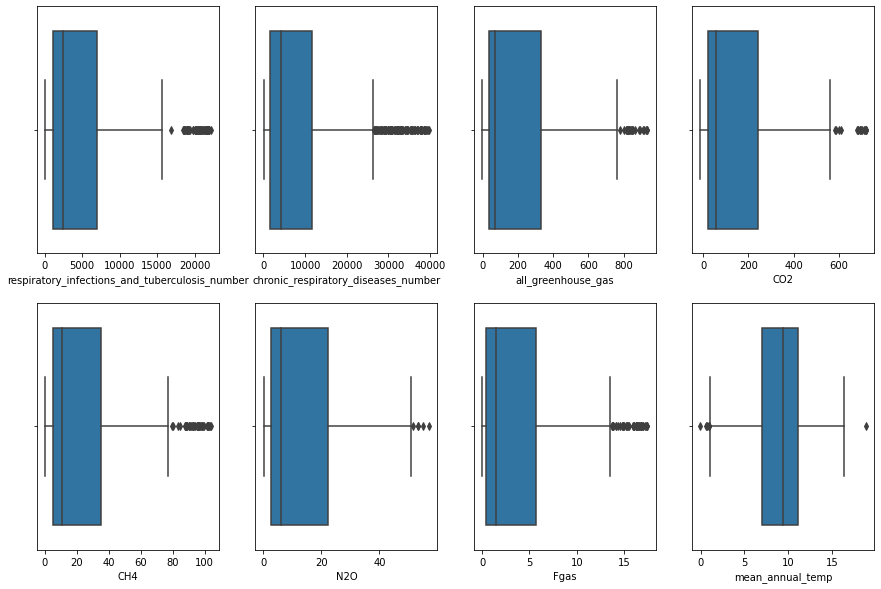

In [47]:
dfs = []

for columna in columnas:
    iqr = df_simp[columna].quantile(0.75) - df_simp[columna].quantile(0.25)
    filtro_inferior = df_simp[columna] > df_simp[columna].quantile(0.25) - (iqr * 1.5)
    filtro_superior = df_simp[columna] < df_simp[columna].quantile(0.75) + (iqr * 1.5)
    df_filtrado = df_simp[filtro_inferior & filtro_superior]
    dfs.append(df_filtrado) 


fig, ax1 = plt.subplots(2,4,sharey=True)
k=0

for i in [0,1]:
    for j in [0,1,2,3]:
        #sns.boxplot(data=df_filtrado,x=columnas[k], ax=ax1[i,j])
        sns.boxplot(data=dfs[k],x=columnas[k], ax=ax1[i,j])
        k+= 1

#ax = sns.boxplot(x=df_filtrado['total_respiratory_diseases'])
#ax.set_title('Distribución filtrada de muertes por enfermedades respiratorias desde 1990 a 2018')
#ax.set_xlabel('Cantidad de muertes')

In [50]:
#iqr = df_simp[columnas[0]].quantile(0.75) - df_simp[columnas[0]].quantile(0.25)
#filtro_inferior = df_simp[columnas[0]] > df_simp[columnas[0]].quantile(0.25) - (iqr * 1.5)
#filtro_superior = df_simp[columnas[0]] < df_simp[columnas[0]].quantile(0.75) + (iqr * 1.5)
#columna0 = df_simp[filtro_inferior & filtro_superior]
#sns.boxplot(data=columna0,x=columnas[0])




<AxesSubplot:>

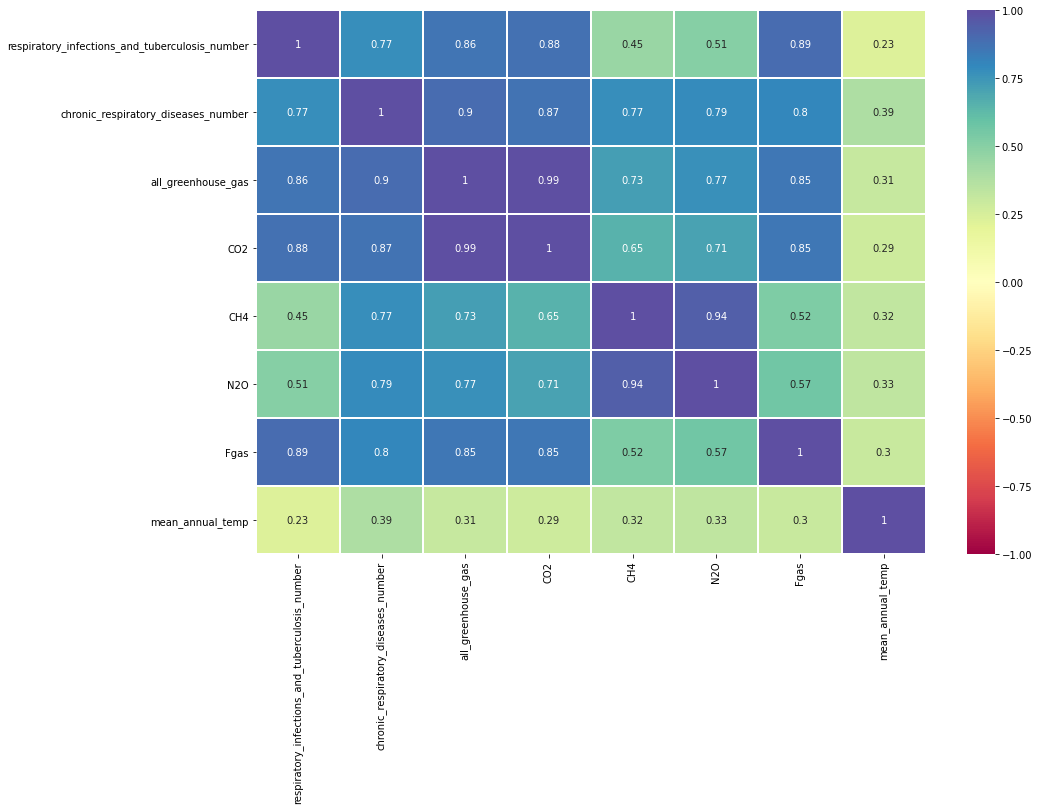

In [ ]:
sns.heatmap(df_filtrado.corr(), vmin=-1, vmax=1, cmap='Spectral',linewidth=2,annot=True)

In [ ]:
sns.scatterplot(df[''],df[''])
corrdf['insulin'].corr(df['glucose'])

KeyError: 'insulin'

In [ ]:
#Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

##### Pendientes

* renombrar columnas para que se vea titulo chido en gráficas
* Darle estilo a las gráficas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>